In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
plt.rcParams['figure.figsize'] = (12,9)

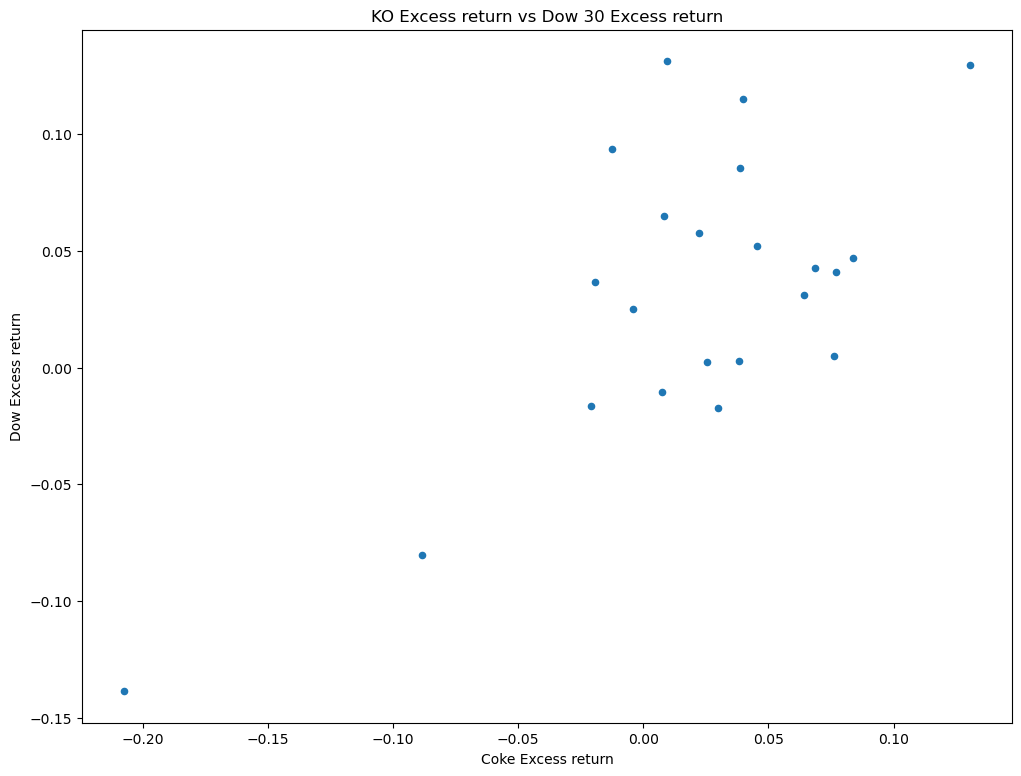

In [3]:
df = pd.read_csv('fin_data_set.csv')
scatt = df.plot.scatter(
    x = 'Coke_Q_EX_R',
    y = 'Dow_Q_EX_R',
    title = 'KO Excess return vs Dow 30 Excess return'
)
scatt.set(xlabel = 'Coke Excess return', ylabel = 'Dow Excess return')
plt.show();

In [4]:
def corr(x,y, **kwargs):
    coef = np.corrcoef(x,y)[0][1]
    label = r'$\rho$ = ' + str(round(coef,2))
    #Add to plot 
    ax = plt.gca()
    ax.annotate(label, xy = (0.3,0.15), size = 20, xycoords = ax.transAxes)

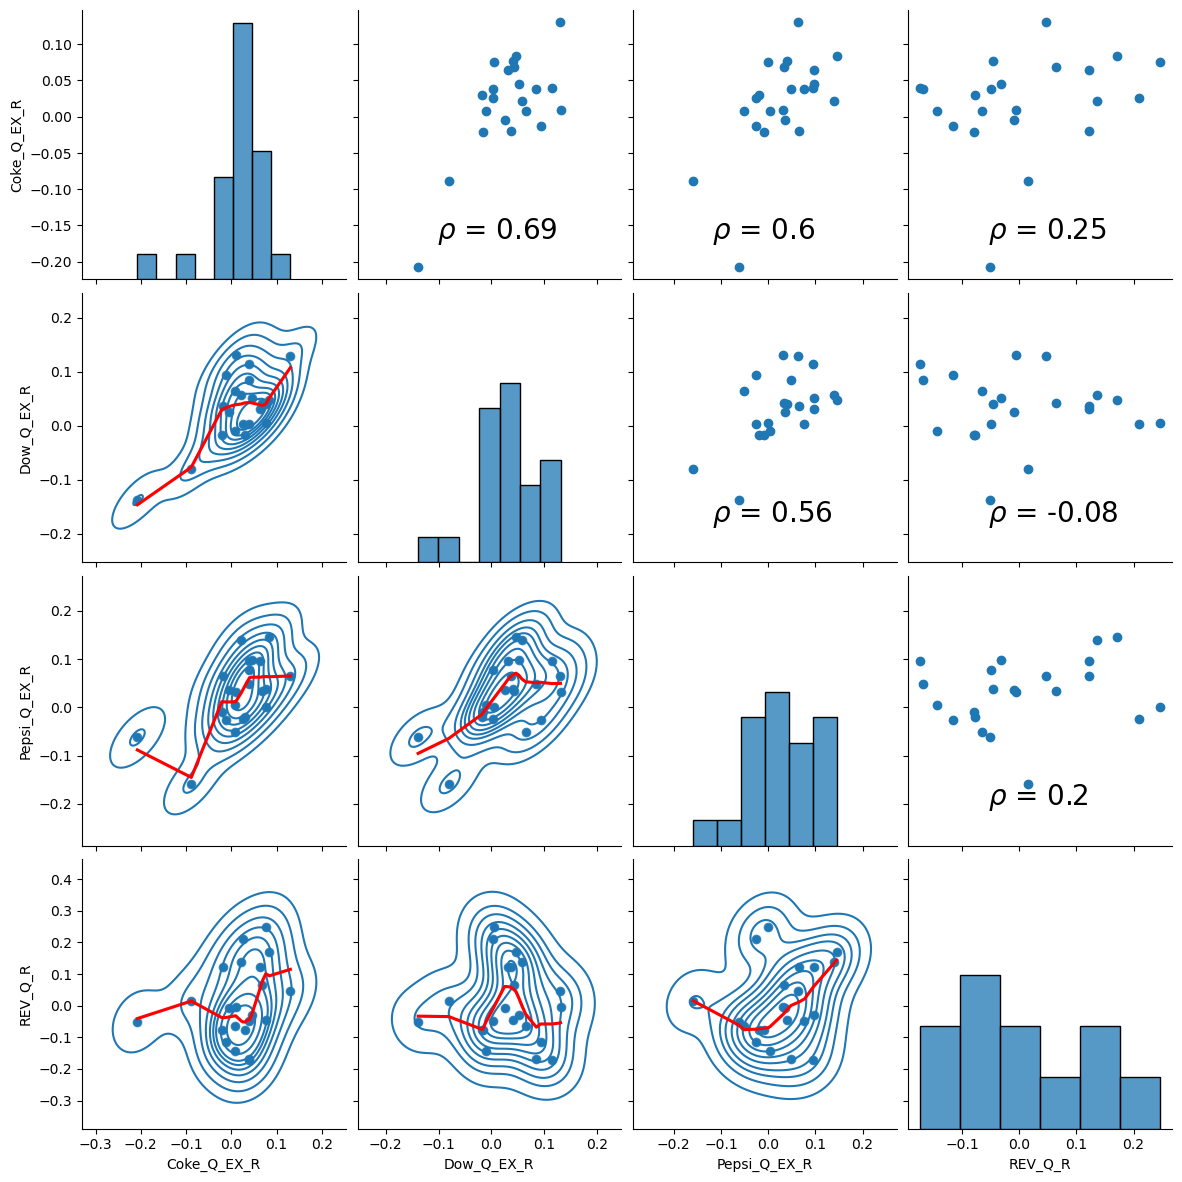

In [5]:
grid = sns.pairplot(
    df, vars = ['Coke_Q_EX_R', 'Dow_Q_EX_R', 'Pepsi_Q_EX_R', 'REV_Q_R'], height = 3
)
#Scatter + pearson corr in upper right,
grid = grid.map_upper(plt.scatter)
grid = grid.map_upper(corr)
#density plot and regression line bottom left
grid = grid.map_lower(sns.kdeplot)
grid = grid.map_lower(sns.regplot, lowess= True, line_kws = {'color' : 'red'})

## Linear Regression Estimation

In [6]:
result = smf.ols("Coke_Q_EX_R ~ Dow_Q_EX_R + Pepsi_Q_EX_R + REV_Q_R", data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Coke_Q_EX_R   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     9.150
Date:                Sat, 17 May 2025   Prob (F-statistic):           0.000677
Time:                        23:25:26   Log-Likelihood:                 38.570
No. Observations:                  22   AIC:                            -69.14
Df Residuals:                      18   BIC:                            -64.78
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0080      0.011     -0.716      0.483      -0.032       0.015
Dow_Q_EX_R       0.6197      0.195      3.173      0.005       0.209       1.030
Pepsi_Q_EX_R     0.2187      0.179      1.221      0.238      -0.158       0.595
REV_Q_R          0.1435      0.088      1.632      0.120      -0.041       0.328
==============================================================================
Omnibus:                        1.644   Durbin-Watson:                   2.307
Prob(Omnibus):                  0.439   Jarque-Bera (JB):                1.411
Skew:                          -0.564   Prob(JB):                        0.494
Kurtosis:                       2.481   Cond. No.                         24.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
result.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,-0.008017,0.011189,-0.716476,0.482890,-0.031524,0.015490
Dow_Q_EX_R,0.619723,0.195287,3.173393,0.005261,0.209440,1.030006
Pepsi_Q_EX_R,0.218664,0.179107,1.220854,0.237893,-0.157627,0.594955
REV_Q_R,0.143481,0.087912,1.632093,0.120031,-0.041216,0.328178


In [8]:
#Outlier depiction
np.random.seed(42)
n = 30
x = np.random.uniform(0,5,n)
y = 1 + 3*x + np.random.normal(0,1,n)

#Add outlier
x_with_out = np.append(x, 2.5)
y_with_out = np.append(y,17)

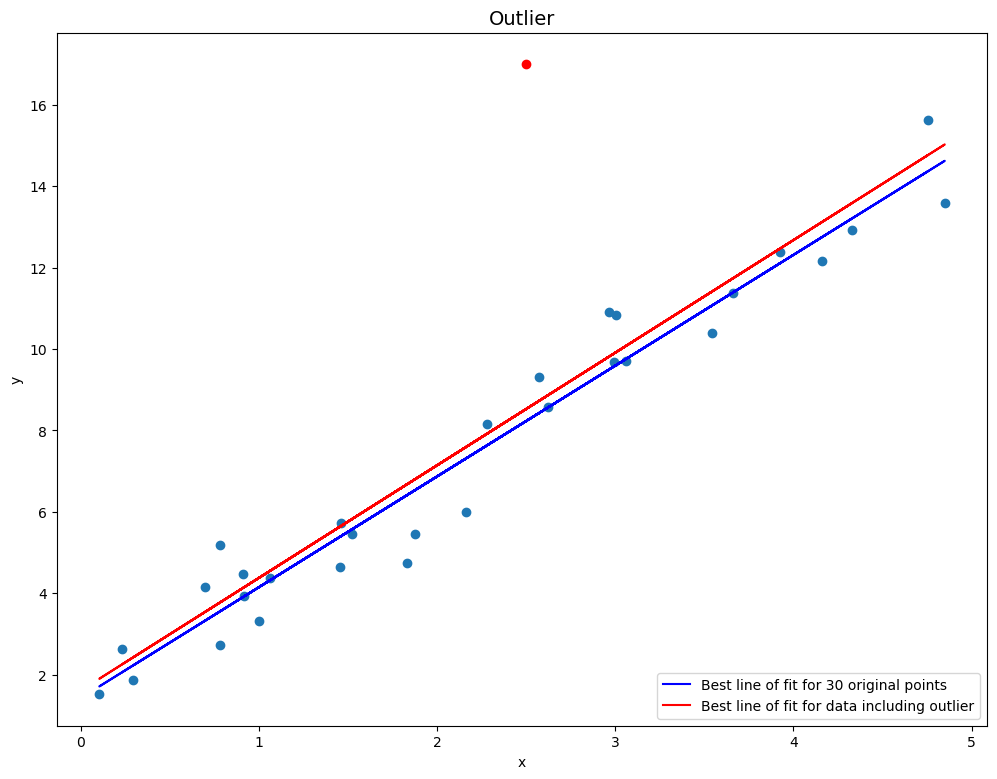

In [9]:
# Plot best line of fit for 30 original points only (in black) and for 30+outlier (in red)
plt.title("Outlier", {"size": 14})
plt.plot(x, y, "o")  # scatterplot
plt.plot(2.5, 17, "ro")  # Outlier in red

# line of fit for 30 original points only
(a, b) = np.polyfit(x, y, 1)
plt.plot(x, a * x + b, "b-", label="Best line of fit for 30 original points")

# line of fit for 30+outlier
(ao, bo) = np.polyfit(x_with_out, y_with_out, 1)
plt.plot(
    x_with_out,
    ao * x_with_out + bo,
    "r-",
    label="Best line of fit for data including outlier",
)

plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="lower right")
plt.show()

In [10]:
# Add non-influential leverage point at (8, 25)
x_with_lev = np.append(x, 8)
y_with_lev = np.append(y, 25)

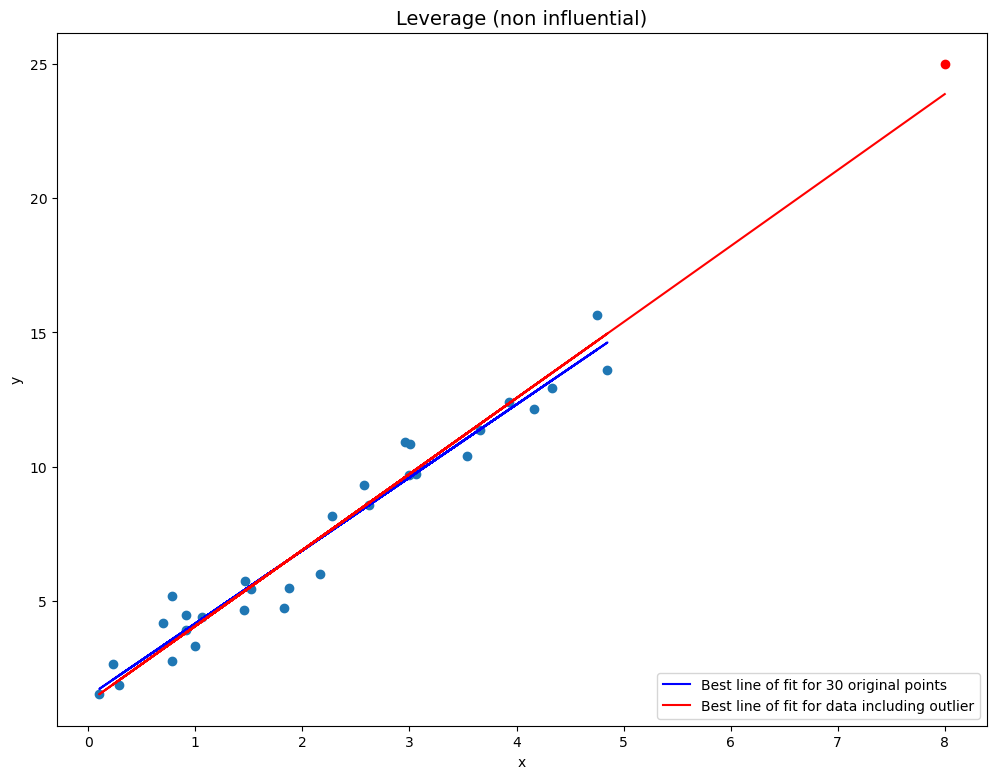

In [11]:
# Plot best line of fit for 30 original points only (in black) and for 30+lev (in red)
plt.title("Leverage (non influential)", {"size": 14})
plt.plot(x, y, "o")  # scatterplot
plt.plot(8, 25, "ro")  # non-influential outlier in red

# line of fit for 30 original points only
(a, b) = np.polyfit(x, y, 1)
plt.plot(x, a * x + b, "b-", label="Best line of fit for 30 original points")

# line of fit for 30+outlier
(al, bl) = np.polyfit(x_with_lev, y_with_lev, 1)
plt.plot(
    x_with_lev,
    al * x_with_lev + bl,
    "r-",
    label="Best line of fit for data including outlier",
)

plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="lower right")
plt.show()

In [12]:
# Add non-influential leverage point at (8, 25)
x_with_inf = np.append(x, 8)
y_with_inf = np.append(y, 5)

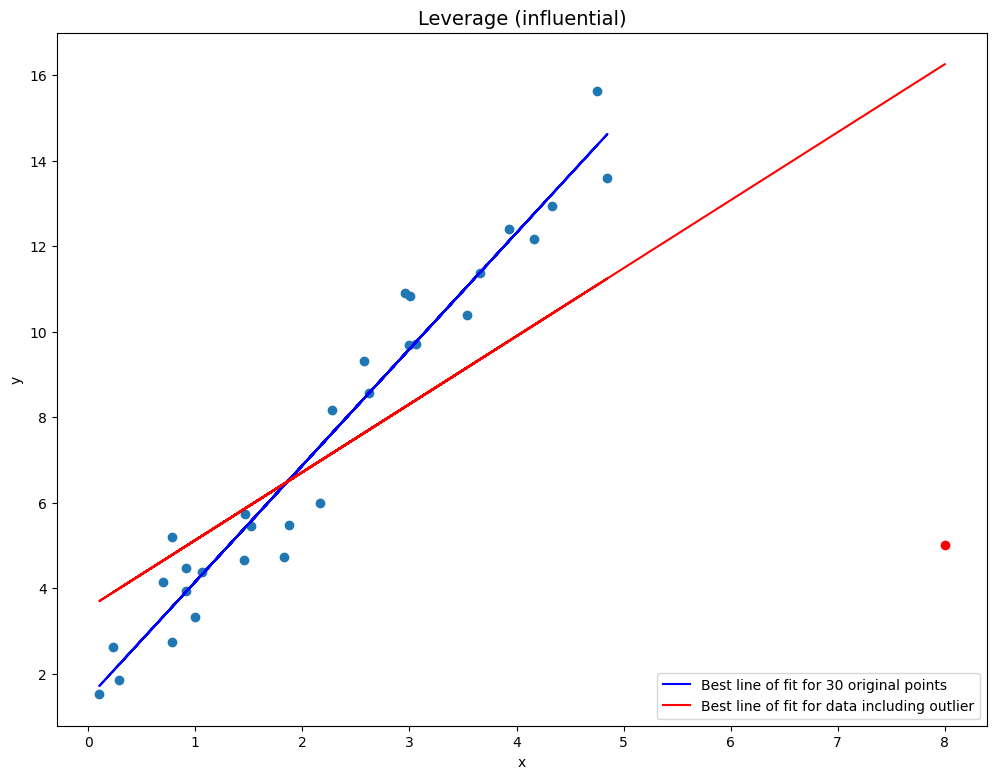

In [13]:
# Plot best line of fit for 30 original points only (in black) and for 30+lev (in red)
plt.title("Leverage (influential)", {"size": 14})
plt.plot(x, y, "o")  # scatterplot
plt.plot(8, 5, "ro")  # influential outlier in red

# line of fit for 30 original points only
(a, b) = np.polyfit(x, y, 1)
plt.plot(x, a * x + b, "b-", label="Best line of fit for 30 original points")

# line of fit for 30+outlier
(ai, bi) = np.polyfit(x_with_inf, y_with_inf, 1)
plt.plot(
    x_with_inf,
    ai * x_with_inf + bi,
    "r-",
    label="Best line of fit for data including outlier",
)

plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="lower right")
plt.show()

# ***LESSON 2***
## **Correlation and Multicolinearity**

In [14]:
df = pd.read_csv('fin_data_set.csv')

<Axes: >

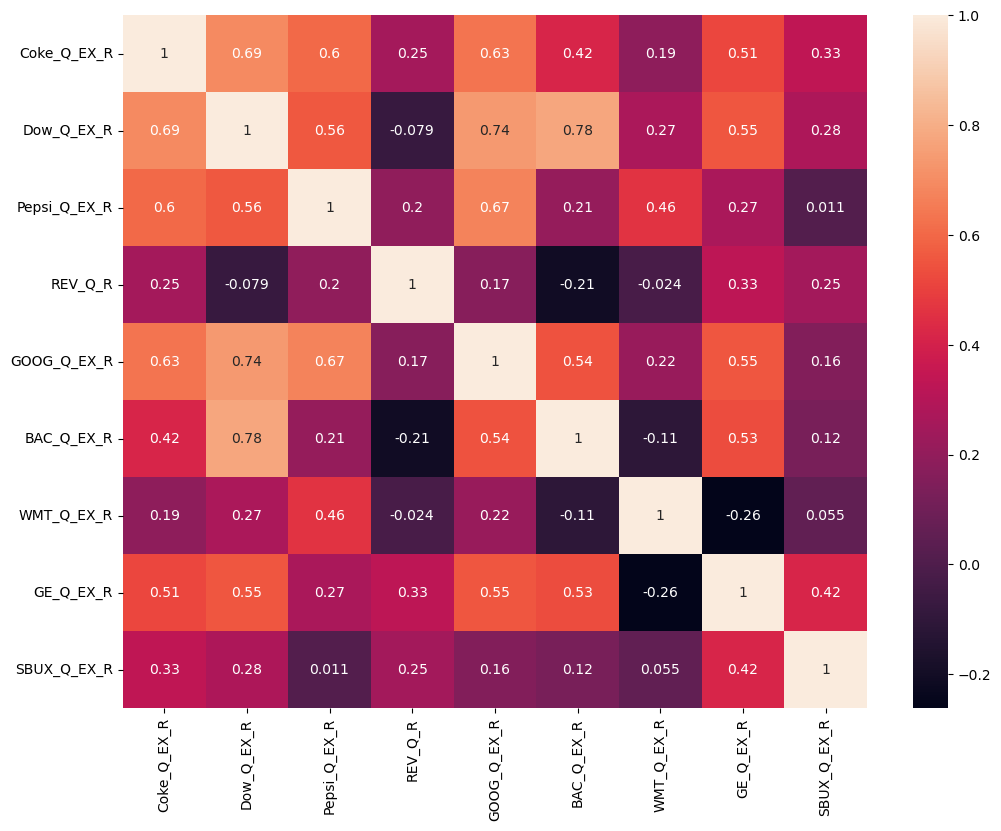

In [15]:
data = df[
    [
        "Coke_Q_EX_R",
        "Dow_Q_EX_R",
        "Pepsi_Q_EX_R",
        "REV_Q_R",
        "GOOG_Q_EX_R",
        "BAC_Q_EX_R",
        "WMT_Q_EX_R",
        "GE_Q_EX_R",
        "SBUX_Q_EX_R"
    ]
]
c = data.corr()
sns.heatmap(c, annot=True)

In [16]:
model1 = smf.ols('Coke_Q_EX_R ~ Dow_Q_EX_R + Pepsi_Q_EX_R + REV_Q_R + GOOG_Q_EX_R + BAC_Q_EX_R + WMT_Q_EX_R + GE_Q_EX_R + SBUX_Q_EX_R', data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Coke_Q_EX_R   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     2.798
Date:                Sat, 17 May 2025   Prob (F-statistic):             0.0482
Time:                        23:25:29   Log-Likelihood:                 39.396
No. Observations:                  22   AIC:                            -60.79
Df Residuals:                      13   BIC:                            -50.97
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0059      0.017     -0.337      0.742      -0.043       0.032
Dow_Q_EX_R       0.7091      0.471      1.504      0.156      -0.309       1.727
Pepsi_Q_EX_R     0.2686      0.267      1.005      0.333      -0.309       0.846
REV_Q_R          0.1007      0.121      0.834      0.419      -0.160       0.362
GOOG_Q_EX_R      0.0233      0.208      0.112      0.912      -0.425       0.472
BAC_Q_EX_R      -0.0762      0.156     -0.487      0.634      -0.414       0.262
WMT_Q_EX_R      -0.1313      0.213     -0.617      0.548      -0.591       0.328
GE_Q_EX_R       -0.0040      0.106     -0.037      0.971      -0.234       0.226
SBUX_Q_EX_R      0.0824      0.135      0.608      0.554      -0.210       0.375
==============================================================================
Omnibus:                        1.980   Durbin-Watson:                   2.255
Prob(Omnibus):                  0.372   Jarque-Bera (JB):                1.638
Skew:                          -0.628   Prob(JB):                        0.441
Kurtosis:                       2.543   Cond. No.                         45.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
X = sm.add_constant(df[['Dow_Q_EX_R','Pepsi_Q_EX_R', 'REV_Q_R', 'GOOG_Q_EX_R', 'BAC_Q_EX_R', 'WMT_Q_EX_R', 'GE_Q_EX_R', 'SBUX_Q_EX_R']])
y=df['Coke_Q_EX_R']
model = sm.OLS(y,X).fit()
model.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,-0.005859,0.017409,-0.336544,0.741832,-0.043469,0.031751
Dow_Q_EX_R,0.709085,0.471371,1.504303,0.156406,-0.309250,1.727419
Pepsi_Q_EX_R,0.268625,0.267324,1.004868,0.333299,-0.308893,0.846144
REV_Q_R,0.100740,0.120734,0.834399,0.419126,-0.160090,0.361570
GOOG_Q_EX_R,0.023328,0.207589,0.112377,0.912241,-0.425141,0.471798
BAC_Q_EX_R,-0.076156,0.156360,-0.487054,0.634329,-0.413950,0.261639
WMT_Q_EX_R,-0.131313,0.212743,-0.617238,0.547737,-0.590916,0.328290
GE_Q_EX_R,-0.003975,0.106396,-0.037365,0.970762,-0.233830,0.225879
SBUX_Q_EX_R,0.082359,0.135423,0.608162,0.553557,-0.210205,0.374923


In [18]:
X_dow = sm.add_constant(df[['Pepsi_Q_EX_R', 'REV_Q_R', 'GOOG_Q_EX_R', 'BAC_Q_EX_R', 'WMT_Q_EX_R', 'GE_Q_EX_R', 'SBUX_Q_EX_R']])
y_dow = df['Dow_Q_EX_R']
model_dow = sm.OLS(y_dow, X_dow).fit()
model_dow.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Dow_Q_EX_R   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     11.91
Date:                Sat, 17 May 2025   Prob (F-statistic):           6.13e-05
Time:                        23:25:29   Log-Likelihood:                 51.064
No. Observations:                  22   AIC:                            -86.13
Df Residuals:                      14   BIC:                            -77.40
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0061      0.010     -0.625      0.542      -0.027       0.015
Pepsi_Q_EX_R     0.1892      0.143      1.324      0.207      -0.117       0.496
REV_Q_R         -0.0605      0.067     -0.910      0.378      -0.203       0.082
GOOG_Q_EX_R      0.0977      0.115      0.851      0.409      -0.148       0.344
BAC_Q_EX_R       0.2319      0.063      3.658      0.003       0.096       0.368
WMT_Q_EX_R       0.1898      0.109      1.734      0.105      -0.045       0.425
GE_Q_EX_R        0.0570      0.058      0.977      0.345      -0.068       0.182
SBUX_Q_EX_R      0.0800      0.074      1.084      0.297      -0.078       0.238
==============================================================================
Omnibus:                        0.530   Durbin-Watson:                   2.372
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.588
Skew:                          -0.043   Prob(JB):                        0.745
Kurtosis:                       2.204   Cond. No.                         26.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
labels = [
    "Intercept",
    "Dow_Q_EX_R",
    "Pepsi_Q_EX_R",
    "REV_Q_R",
    "GOOG_Q_EX_R",
    "BAC_Q_EX_R",
    "WMT_Q_EX_R",
    "GE_Q_EX_R",
    "SBUX_Q_EX_R",
]

variables = model1.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]

pd.DataFrame(vif[1:], labels[1:], columns=["VIF"])

,VIF
Dow_Q_EX_R,6.957440
Pepsi_Q_EX_R,2.748897
REV_Q_R,1.612413
GOOG_Q_EX_R,3.241519
BAC_Q_EX_R,4.269485
WMT_Q_EX_R,2.184550
GE_Q_EX_R,3.096814
SBUX_Q_EX_R,1.511017


In [20]:
model1.model.exog

array([[ 1.00000000e+00,  3.64548750e-02,  6.52197970e-02,
         1.22252480e-01,  1.08749024e-01, -2.03177800e-03,
         9.86118170e-02,  1.97547230e-02,  3.53791210e-02],
       [ 1.00000000e+00, -1.64610370e-02, -9.56759200e-03,
        -7.85163360e-02,  1.97492390e-02,  1.43278407e-01,
        -3.45966150e-02, -5.89548000e-02, -8.33418240e-02],
       [ 1.00000000e+00,  9.36474830e-02, -2.59913090e-02,
        -1.15113326e-01,  1.43642460e-02,  3.75962123e-01,
        -4.12719110e-02,  2.70496320e-02,  4.40823280e-02],
       [ 1.00000000e+00,  5.22392430e-02,  9.70874840e-02,
        -3.09278350e-02,  1.35062321e-01,  3.21109560e-02,
         1.32794061e-01, -1.80705090e-02,  9.06006630e-02],
       [ 1.00000000e+00,  4.27632430e-02,  3.38337950e-02,
         6.40491340e-02,  2.44547640e-02,  3.41809350e-02,
         6.84671430e-02, -1.11772045e-01, -1.00162463e-01],
       [ 1.00000000e+00,  6.50793870e-02, -5.09047560e-02,
        -6.43166360e-02,  8.97664010e-02,  1.385730

# ***L3 PCA and Variable Transformation***

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [22]:
df = pd.read_csv('fin_data_set.csv')

In [23]:
pc = df[['Dow_Q_EX_R', 'Pepsi_Q_EX_R', 'REV_Q_R', 'GOOG_Q_EX_R', 'BAC_Q_EX_R', 'WMT_Q_EX_R', 'GE_Q_EX_R', 'SBUX_Q_EX_R']]
pca_data = preprocessing.scale(pc) # Standardize the data
# Perform PCA
pca = PCA(n_components=8)
pca.fit(pca_data)

PCA(n_components=8)

In [24]:
pr_var = pca.explained_variance_ratio_
cum_pr = np.cumsum(pca.explained_variance_ratio_)
ind = ['Proportion of variance', 'Cumulative proportion of variance']
cols = [f'PC{i}' for i in range(1,9)]
pd.DataFrame(np.vstack((pr_var, cum_pr)), ind, columns=cols)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Proportion of variance,0.417539,0.193287,0.171490,0.108867,0.042000,0.028306,0.026893,0.011619
Cumulative proportion of variance,0.417539,0.610826,0.782316,0.891183,0.933183,0.961489,0.988381,1.000000


In [25]:
pc_res = pd.DataFrame(pca.components_.T, index=list(pc.columns), columns=cols)
pc_res

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Dow_Q_EX_R,0.501013,0.081975,-0.201491,0.151476,0.172552,-0.161302,-0.116793,0.780570
Pepsi_Q_EX_R,0.370323,0.416369,0.215351,-0.267349,-0.486188,-0.340799,-0.423131,-0.200210
REV_Q_R,0.089143,-0.205496,0.723855,-0.314653,0.525310,0.024685,-0.213269,0.069342
GOOG_Q_EX_R,0.481635,0.115076,0.033447,-0.219037,-0.147889,0.789841,0.241923,-0.037978
BAC_Q_EX_R,0.399072,-0.169106,-0.470595,0.014795,0.462351,-0.034007,-0.323626,-0.520391
WMT_Q_EX_R,0.116011,0.659655,0.213805,0.389464,0.370728,-0.129019,0.392582,-0.214001
GE_Q_EX_R,0.399918,-0.444523,0.093024,-0.117590,-0.150220,-0.440478,0.622124,-0.127903
SBUX_Q_EX_R,0.198186,-0.321096,0.334835,0.769979,-0.249503,0.146820,-0.239618,-0.106832


In [26]:
mat = {}
for i in range(6):
    col = pc_res.columns[i]
    abs_col = pc_res.iloc[:,i].abs()
    var = abs_col.idxmax()
    value = pc_res.loc[var,col]

    print(f'{col} : {var} ({value})')

PC1 : Dow_Q_EX_R (0.5010125221637276)
PC2 : WMT_Q_EX_R (0.6596550823213457)
PC3 : REV_Q_R (0.7238550283899894)
PC4 : SBUX_Q_EX_R (0.7699787961845733)
PC5 : REV_Q_R (0.5253102532121241)
PC6 : GOOG_Q_EX_R (0.7898411470244644)


In [27]:
model_4 = smf.ols(
    "Coke_Q_EX_R ~ Dow_Q_EX_R + REV_Q_R + GOOG_Q_EX_R + WMT_Q_EX_R + SBUX_Q_EX_R",
    data=df,
).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Coke_Q_EX_R   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     4.493
Date:                Sat, 17 May 2025   Prob (F-statistic):            0.00950
Time:                        23:25:32   Log-Likelihood:                 38.030
No. Observations:                  22   AIC:                            -64.06
Df Residuals:                      16   BIC:                            -57.51
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0109      0.014     -0.757      0.460      -0.042       0.020
Dow_Q_EX_R      0.6091      0.286      2.133      0.049       0.004       1.214
REV_Q_R         0.1418      0.103      1.380      0.186      -0.076       0.359
GOOG_Q_EX_R     0.1060      0.177      0.600      0.557      -0.268       0.480
WMT_Q_EX_R     -0.0004      0.144     -0.003      0.998      -0.305       0.304
SBUX_Q_EX_R     0.0551      0.117      0.472      0.644      -0.193       0.303
==============================================================================
Omnibus:                        1.148   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.563   Jarque-Bera (JB):                1.031
Skew:                          -0.466   Prob(JB):                        0.597
Kurtosis:                       2.493   Cond. No.                         30.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

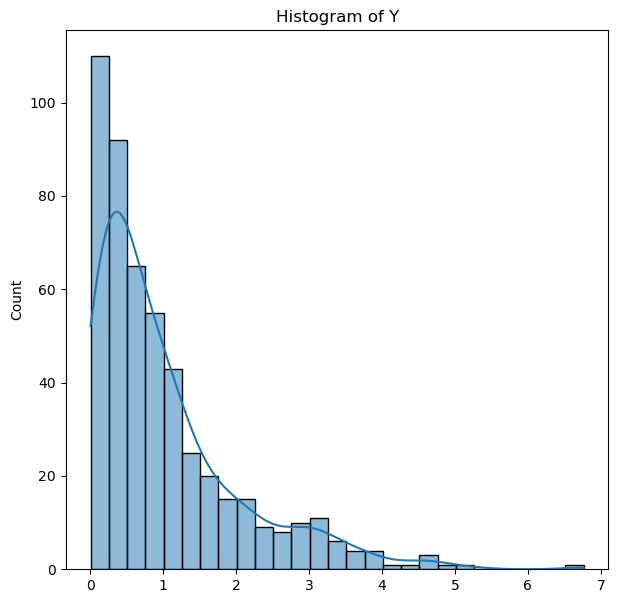

In [28]:
np.random.seed(0)
Y = np.random.exponential(size=500)
#Plot data 
plt.figure(figsize=(7,7))
plt.title('Histogram of Y')
sns.histplot(Y, kde=True)
plt.show()

Optimal Box-Cox transformation lambda: 0.2325441269447074


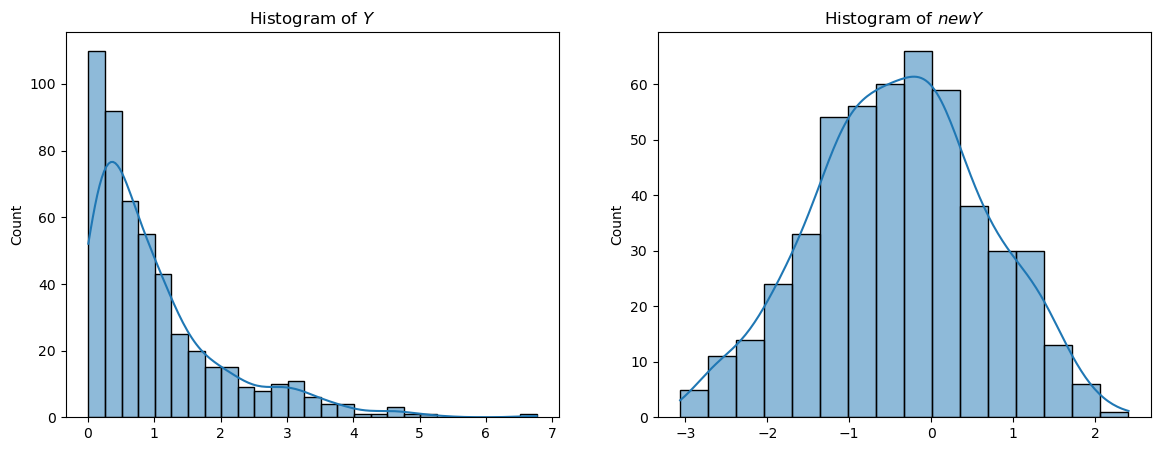

In [29]:
#Box Cox
new_Y, best_lambda = boxcox(Y)
print('Optimal Box-Cox transformation lambda:', best_lambda)
#Plot og data
plt.figure(figsize=(14,5))
ax1 = plt.subplot(121)
sns.histplot(Y, kde=True, ax=ax1)
plt.title('Histogram of $Y$')

#Plot dist of new Y
ax2 = plt.subplot(122)
sns.histplot(new_Y, kde=True, ax=ax2)
plt.title('Histogram of $newY$')
plt.show()

# ***L3 MONTE CARLO***

## **Deterministic Models**

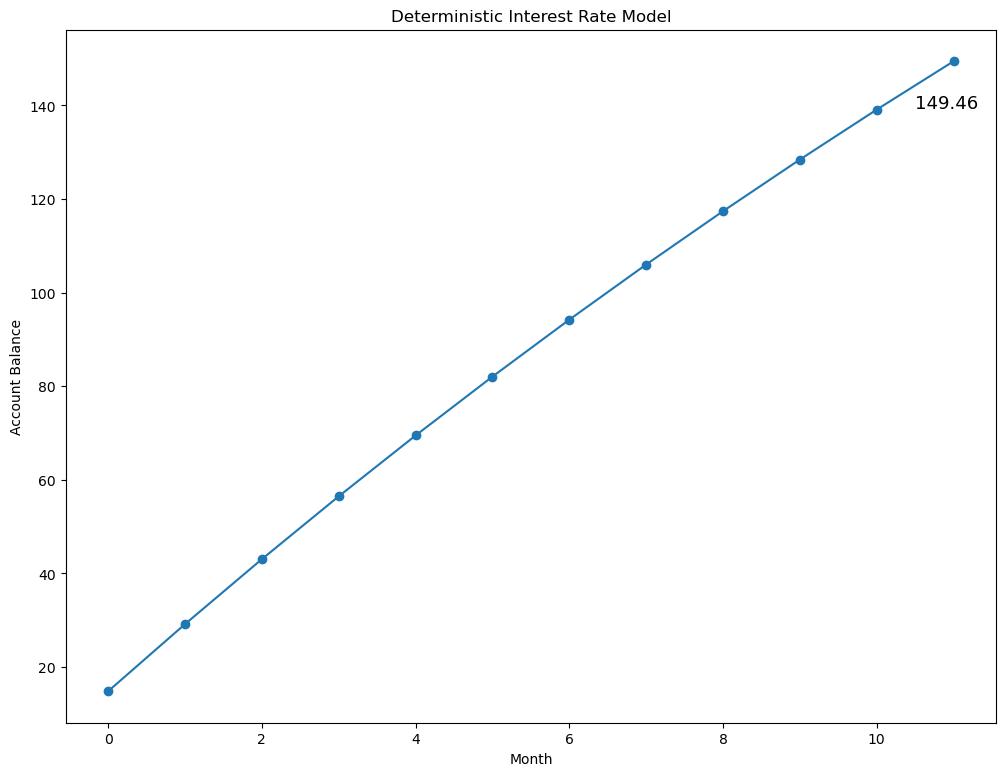

In [30]:
#Interest rate example : 
month = np.linspace(start=1,stop=12, num=12)
x =[]

for i in range(12):
    x.append(10*(1 + 0.4/12)**(12-i))

cum_x = np.cumsum(x)

#Plot : 
plt.plot(cum_x, marker='o')
plt.title('Deterministic Interest Rate Model')
plt.ylabel('Account Balance')
plt.xlabel('Month')
plt.annotate(
    round(cum_x[11], 2), (10.5, cum_x[11] - 10), fontsize=13
)  ;

## **2.Stochastic Model**

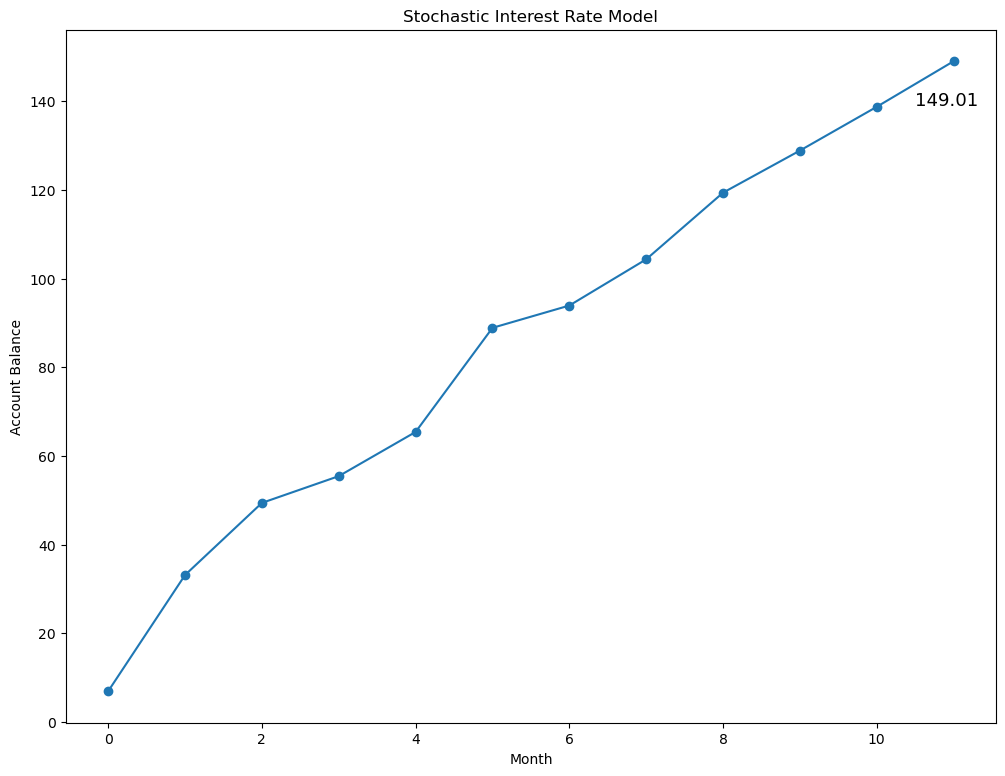

In [31]:
np.random.seed(123)
int_1 = np.random.normal(0.4,0.7,12)
bal_1 = []

for i in range(12):
    bal_1.append(10*(1+int_1[i]/12)**(12-i))
cum_bal = np.cumsum(bal_1)

plt.plot(cum_bal, marker='o')
plt.title('Stochastic Interest Rate Model')
plt.ylabel('Account Balance')
plt.xlabel('Month')
plt.annotate(
    round(cum_bal[11],2), (10.5, cum_bal[11]-10), fontsize=13
);


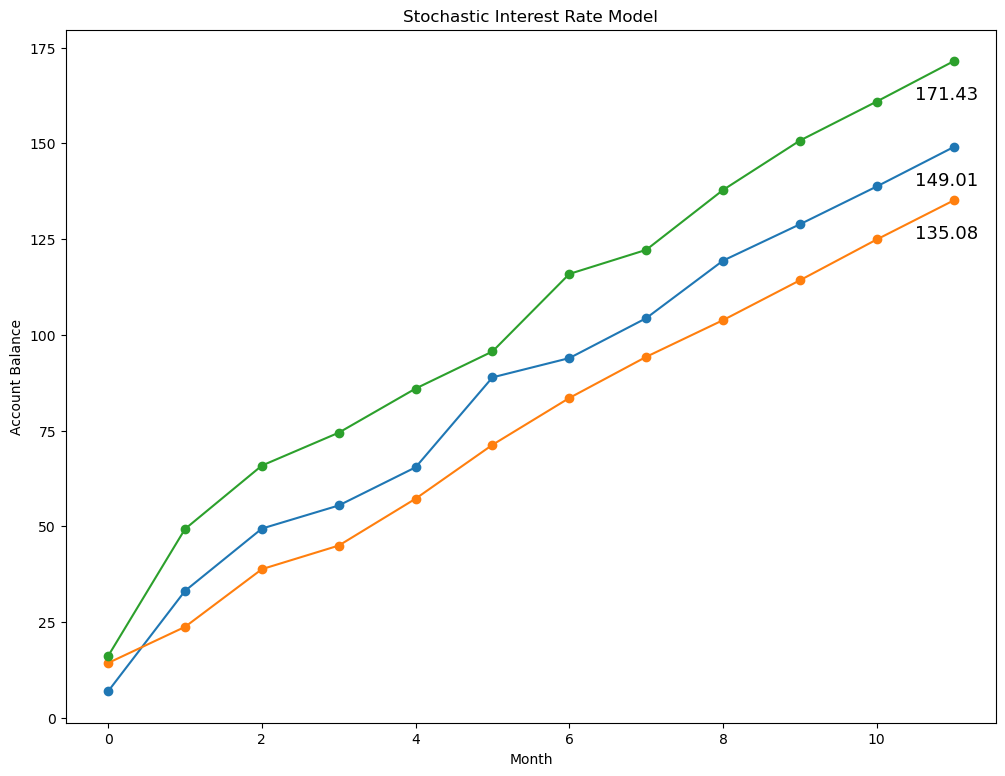

In [32]:
#Stochastic Model 2
np.random.seed(375)
int_2 = np.random.normal(0.4,0.7,12)
bal_2 = []

for i in range(12):
    bal_2.append(10*(1+int_2[i]/12)**(12-i))
cum_bal_2 = np.cumsum(bal_2)

#Stochastic Model 3
np.random.seed(999)
int_3 = np.random.normal(0.4,0.7,12)
bal_3 = []
for i in range(12):
    bal_3.append(10*(1+int_3[i]/12)**(12-i))
cum_bal_3 = np.cumsum(bal_3)

#Plot
plt.plot(cum_bal, marker='o')
plt.plot(cum_bal_2, marker='o')
plt.plot(cum_bal_3, marker='o')
plt.title('Stochastic Interest Rate Model')
plt.ylabel('Account Balance')
plt.xlabel('Month')
plt.annotate(round(cum_bal[11], 2), (10.5, cum_bal[11] - 10), fontsize=13)
plt.annotate(round(cum_bal_2[11], 2), (10.5, cum_bal_2[11] - 10), fontsize=13)
plt.annotate(round(cum_bal_3[11], 2), (10.5, cum_bal_3[11] - 10), fontsize=13);

In [33]:
#Monte Carlo Simulations : 
def Hist(trials):
    res = []

    #Simulate MonteCarlo sample : 
    for j in range(trials):
        int = np.random.normal(0.4,0.7,12)
        bal = []
        for i in range(12):
            bal.append(10*(1+int[i]/12)**(12-i))
        res.append(bal)

    #Plot Hist
    plt.hist(res, bins=30, density=True, histtype="stepfilled", alpha=0.7)
    plt.title("Histogram of {} Simulations".format(trials))
    plt.xlabel("Cumulative Account Balance")
    plt.ylabel("Frequency")

    #Stats : 
    avg = np.mean(res)
    std = np.std(res)
    lowb = avg - 1.96*std/np.sqrt(trials)
    upb = avg + 1.96*std/np.sqrt(trials)
    width = upb-lowb
    textstr = f'{trials} trials \n Average : {avg}\n Standard Deviation : {std}\n Confidence interval : [{lowb} ; {upb}]\n Confidence interval width : {width}'
    return textstr

Text(0.95, 0.85, '1000 trials \n Average : 13.569819572020215\n Standard Deviation : 7.227140964254002\n Confidence interval : [13.12187673422451 ; 14.01776240981592]\n Confidence interval width : 0.8958856755914084')

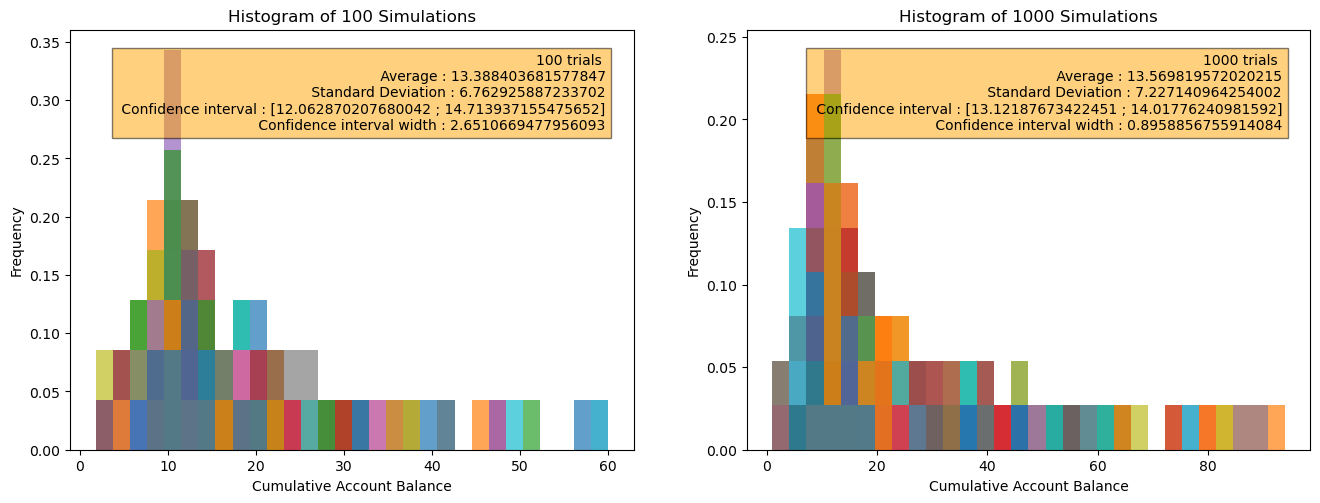

In [35]:
#Histogram plots : 
plt.figure(figsize=(16,12))

#100 Trials : 
ax1 = plt.subplot(221)
fig1 = Hist(100)
plt.text(
    0.95,
    0.85,
    fig1,
    ha="right",
    va="center",
    fontsize=10,
    bbox={"facecolor": "orange", "alpha": 0.5},
    transform=ax1.transAxes,
)
# No. trials = 1,000
ax2 = plt.subplot(222)
fig2 = Hist(1000)
plt.text(
    0.95,
    0.85,
    fig2,
    ha="right",
    va="center",
    fontsize=10,
    bbox={"facecolor": "orange", "alpha": 0.5},
    transform=ax2.transAxes,
)

# No. trials = 100,000



